### Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.interpolate import interp1d

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




1.   download the zip file on to your computer
2.   delete the csv files after 90. only keep the first 90 files
3.   upload in a folder on your google drive 
4.   mount your google drive. from the file portion on the left side of your screen. click mount drive on top
5.   in the file forder click on drive and navigate through drive files from collab. once you reach the file that contains all the csv files we need to work on then right click on that file and select copy path. paste the path underneath in base directory. 
6. run the code to download to the dataset and upload it as one dataframe 



In [ ]:
BASE_DIRECTORY="/content/gdrive/My Drive/Data Mining/Energy Consumption" #give the location where your datamining files are located. try keeping everything in one folder

### 1. Loading the dataset and Preprocessing the sample



Combined all csv files into one file


In [ ]:
for x in range(1,94,1):
  df=pd.read_csv(BASE_DIRECTORY+"/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_"+str(x)+".csv")
  if(x==1):
    f_df=df
    continue
  f_df=pd.concat([f_df,df])
df=f_df


In [ ]:
df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent
...,...,...,...,...,...,...
92932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022,ACORN-C,Affluent
92932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188,ACORN-C,Affluent
92932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073,ACORN-C,Affluent
92932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025,ACORN-C,Affluent


Saved the dataframe on to our drive

In [ ]:
df.to_csv("/content/gdrive/My Drive/Data Mining/power_networks_final_dataframe.csv")

Now once we need our dataframe rather than calling all the functions above. we'll only run the two lines of code below. it will load the dataframe


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Data Mining/power_networks_final_dataframe.csv")
df=df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df #this is what our final data frame should look like

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent
...,...,...,...,...,...,...
92932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022,ACORN-C,Affluent
92932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188,ACORN-C,Affluent
92932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073,ACORN-C,Affluent
92932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025,ACORN-C,Affluent


As this dataframe is very large to work with hence we will apply and check all our functions on a simpler version of the dataframe. we will load this simple dataframe below

In [ ]:
simple_df=pd.read_csv(BASE_DIRECTORY+"/UKPN-LCL-smartmeter-sample.csv")

We shall do the same for tariffs

In [ ]:
#Removing Year from the DateTime column to make joining easier later on
tariffs=pd.read_excel(BASE_DIRECTORY+"/Tariffs.xlsx")
tariffs['TariffDateTime'] = tariffs['TariffDateTime'].dt.strftime('%Y-%m-%d %H')
aggregation_tariff = {'Tariff': 'first'}
tariffs = tariffs.groupby(['TariffDateTime']).aggregate(aggregation_tariff)
tariffs = tariffs.reset_index()
tariffs['TariffDateTime'] =pd.to_datetime(tariffs['TariffDateTime'])
tariffs['TariffDateTime'] = tariffs['TariffDateTime'].dt.strftime('%m-%d %H')
tariffs

,TariffDateTime,Tariff
0,01-01 00,Normal
1,01-01 01,Normal
2,01-01 02,Normal
3,01-01 03,Normal
4,01-01 04,Normal
...,...,...
8755,12-31 19,Normal
8756,12-31 20,Normal
8757,12-31 21,Normal
8758,12-31 22,Normal


In [ ]:
#Saving the updated tarrif file to drive
tariffs.to_csv("/content/gdrive/My Drive/Data Mining/tariffs_updated.csv")

In [ ]:
#Creating Date and Time Columns
simple_df['DateTime'] = pd.to_datetime(simple_df['DateTime'])
simple_df['Year'] = simple_df['DateTime'].dt.year
simple_df['Month'] = simple_df['DateTime'].dt.month
simple_df['Day'] = simple_df['DateTime'].dt.day
simple_df['Hour'] = simple_df['DateTime'].dt.hour
simple_df['DateTime'] = simple_df['DateTime'].dt.strftime('%Y-%m-%d %H')
simple_df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped,Year,Month,Day,Hour
0,MAC003718,Std,2012-10-17 13,0.09,ACORN-A,Affluent,2012,10,17,13
1,MAC003718,Std,2012-10-17 13,0.16,ACORN-A,Affluent,2012,10,17,13
2,MAC003718,Std,2012-10-17 14,0.212,ACORN-A,Affluent,2012,10,17,14
3,MAC003718,Std,2012-10-17 14,0.145,ACORN-A,Affluent,2012,10,17,14
4,MAC003718,Std,2012-10-17 15,0.104,ACORN-A,Affluent,2012,10,17,15
...,...,...,...,...,...,...,...,...,...,...
17453,MAC003718,Std,2013-10-15 22,0.806,ACORN-A,Affluent,2013,10,15,22
17454,MAC003718,Std,2013-10-15 22,0.515,ACORN-A,Affluent,2013,10,15,22
17455,MAC003718,Std,2013-10-15 23,0.096,ACORN-A,Affluent,2013,10,15,23
17456,MAC003718,Std,2013-10-15 23,0.087,ACORN-A,Affluent,2013,10,15,23


In [ ]:
simple_df.dtypes

LCLid                      object
stdorToU                   object
DateTime                   object
KWH/hh (per half hour)     object
Acorn                      object
Acorn_grouped              object
Year                        int64
Month                       int64
Day                         int64
Hour                        int64
dtype: object

In [ ]:
#Renaming KWH/hh (per half hour) for easier access
simple_df.rename(columns = {list(simple_df)[3]: 'KWH'}, inplace = True)

In [ ]:
#Accouning for null values
simple_df.index.name = 'id'
simple_df.loc[simple_df['KWH'].str.contains("Null"), 'KWH'] = '0'
simple_df['KWH'] = simple_df['KWH'].astype('float64')

In [ ]:
#Implement an aggregation function to take hourly instead of half hourly readings, reducing rows by half
aggregation_function = {'LCLid': 'first', 'stdorToU': 'first', 'DateTime': 'first', 'KWH': 'sum', 'Acorn': 'first',	'Acorn_grouped': 'first',	'Year': 'first',	'Month': 'first', 'Day': 'first',	'Hour': 'first'}
simple_df = simple_df.groupby(['DateTime']).aggregate(aggregation_function)

In [ ]:
simple_df.index =  range(0,simple_df.shape[0])
simple_df.index.name = 'id'
simple_df

,LCLid,stdorToU,DateTime,KWH,Acorn,Acorn_grouped,Year,Month,Day,Hour
id,,,,,,,,,,
0,MAC003718,Std,2012-01-11 00,0.318,ACORN-A,Affluent,2012,1,11,0
1,MAC003718,Std,2012-01-11 01,0.194,ACORN-A,Affluent,2012,1,11,1
2,MAC003718,Std,2012-01-11 02,0.167,ACORN-A,Affluent,2012,1,11,2
3,MAC003718,Std,2012-01-11 03,0.167,ACORN-A,Affluent,2012,1,11,3
4,MAC003718,Std,2012-01-11 04,0.212,ACORN-A,Affluent,2012,1,11,4
...,...,...,...,...,...,...,...,...,...,...
8719,MAC003718,Std,2013-12-10 19,0.673,ACORN-A,Affluent,2013,12,10,19
8720,MAC003718,Std,2013-12-10 20,1.254,ACORN-A,Affluent,2013,12,10,20
8721,MAC003718,Std,2013-12-10 21,0.600,ACORN-A,Affluent,2013,12,10,21


In [ ]:
#Shifting Column Order
simple_df = simple_df[["LCLid", "DateTime", "Year", "Month", "Day", "Hour", "stdorToU", "KWH", "Acorn", "Acorn_grouped"]]
simple_df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped
id,,,,,,,,,,
0,MAC003718,2012-01-11 00,2012,1,11,0,Std,0.318,ACORN-A,Affluent
1,MAC003718,2012-01-11 01,2012,1,11,1,Std,0.194,ACORN-A,Affluent
2,MAC003718,2012-01-11 02,2012,1,11,2,Std,0.167,ACORN-A,Affluent
3,MAC003718,2012-01-11 03,2012,1,11,3,Std,0.167,ACORN-A,Affluent
4,MAC003718,2012-01-11 04,2012,1,11,4,Std,0.212,ACORN-A,Affluent
...,...,...,...,...,...,...,...,...,...,...
8719,MAC003718,2013-12-10 19,2013,12,10,19,Std,0.673,ACORN-A,Affluent
8720,MAC003718,2013-12-10 20,2013,12,10,20,Std,1.254,ACORN-A,Affluent
8721,MAC003718,2013-12-10 21,2013,12,10,21,Std,0.600,ACORN-A,Affluent


In [ ]:
#Make a column for amound paid per hour of consumption
amount_paid = [1]*simple_df.shape[0]
simple_df['Amount_Paid'] = amount_paid
simple_df['DateTime'] = pd.to_datetime(simple_df['DateTime'])
simple_df['DateTime'] = simple_df['DateTime'].dt.strftime('%m-%d %H')
simple_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid
id,,,,,,,,,,,
0,MAC003718,01-11 00,2012,1,11,0,Std,0.318,ACORN-A,Affluent,1
1,MAC003718,01-11 01,2012,1,11,1,Std,0.194,ACORN-A,Affluent,1
2,MAC003718,01-11 02,2012,1,11,2,Std,0.167,ACORN-A,Affluent,1
3,MAC003718,01-11 03,2012,1,11,3,Std,0.167,ACORN-A,Affluent,1
4,MAC003718,01-11 04,2012,1,11,4,Std,0.212,ACORN-A,Affluent,1
...,...,...,...,...,...,...,...,...,...,...,...
8719,MAC003718,12-10 19,2013,12,10,19,Std,0.673,ACORN-A,Affluent,1
8720,MAC003718,12-10 20,2013,12,10,20,Std,1.254,ACORN-A,Affluent,1
8721,MAC003718,12-10 21,2013,12,10,21,Std,0.600,ACORN-A,Affluent,1


In [ ]:
#Calculating amount paid per half hour using tariffs
stdFlatRate = 14.228
simple_df['Amount_Paid'] = np.where(simple_df['stdorToU'] == 'Std', simple_df['Amount_Paid'] * simple_df['KWH'] * stdFlatRate, simple_df['Amount_Paid'])
ToUHighRate = 67.2 
ToUNormalRate = 11.76
ToULowRate = 3.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Merging sample dataframe with tariffs
merged_df = simple_df.join(tariffs.set_index('TariffDateTime'), on='DateTime')
merged_df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid,Tariff
id,,,,,,,,,,,,
0,MAC003718,01-11 00,2012,1,11,0,Std,0.318,ACORN-A,Affluent,4.524504,Normal
1,MAC003718,01-11 01,2012,1,11,1,Std,0.194,ACORN-A,Affluent,2.760232,Normal
2,MAC003718,01-11 02,2012,1,11,2,Std,0.167,ACORN-A,Affluent,2.376076,Normal
3,MAC003718,01-11 03,2012,1,11,3,Std,0.167,ACORN-A,Affluent,2.376076,Normal
4,MAC003718,01-11 04,2012,1,11,4,Std,0.212,ACORN-A,Affluent,3.016336,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
8719,MAC003718,12-10 19,2013,12,10,19,Std,0.673,ACORN-A,Affluent,9.575444,High
8720,MAC003718,12-10 20,2013,12,10,20,Std,1.254,ACORN-A,Affluent,17.841912,High
8721,MAC003718,12-10 21,2013,12,10,21,Std,0.600,ACORN-A,Affluent,8.536800,High


In [ ]:
#Saving updated simple_df to drive
merged_df.to_csv("/content/gdrive/My Drive/Data Mining/sample_updated.csv")

In [ ]:
merged_df.isnull().sum()

LCLid            0
DateTime         0
Year             0
Month            0
Day              0
Hour             0
stdorToU         0
KWH              0
Acorn            0
Acorn_grouped    0
Amount_Paid      0
Tariff           0
dtype: int64

In [ ]:
merged_df=pd.read_csv("/content/gdrive/My Drive/Data Mining/sample_updated.csv")

**Dependence between Categorical and Numerical Values**

1.   Categorical Values:  Acorn_grouped, Tariff, stdorToU
2.   Numerical Values: KWH/hh, Amount_Paid

**Note:** Dictionary to map Acorg_grouped as a numerical category, and binary encoding for stdorToU.


In [ ]:
#Testing Correlation on Sample Dataframe
acorn_grouped_map = {'Affluent': 1, 'Adversity': 2, 'Comfortable': 3, 'ACORN-U': 4, 'ACORN-': 5}
stdorToU_map = {'Std': 0, 'ToU': 1}
tariff_map = {'Low': 0, 'Normal': 1, 'High': 2}

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Month'),
 Text(2.5, 0, 'Day'),
 Text(3.5, 0, 'Hour'),
 Text(4.5, 0, 'stdorToU'),
 Text(5.5, 0, 'KWH'),
 Text(6.5, 0, 'Acorn_grouped'),
 Text(7.5, 0, 'Amount_Paid'),
 Text(8.5, 0, 'Tariff')]

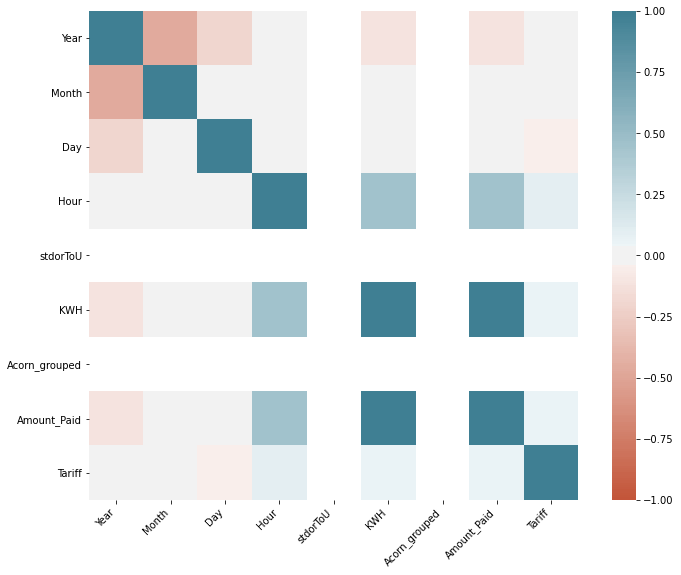

In [ ]:
corr = merged_df.replace({'Acorn_grouped': acorn_grouped_map, 'stdorToU': stdorToU_map, 'Tariff': tariff_map}).corr()
plt.subplots(figsize = (12,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### 2. Preprocessing the Dataset

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Data Mining/power_networks_final_dataframe.csv")
df=df.drop(["Unnamed: 0"],axis=1)
df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent
...,...,...,...,...,...,...
92932469,MAC005565,ToU,2012-06-21 05:30:00.0000000,1.022,ACORN-C,Affluent
92932470,MAC005565,ToU,2012-06-21 06:00:00.0000000,0.188,ACORN-C,Affluent
92932471,MAC005565,ToU,2012-06-21 06:30:00.0000000,0.073,ACORN-C,Affluent
92932472,MAC005565,ToU,2012-06-21 07:00:00.0000000,0.025,ACORN-C,Affluent


In [ ]:
df.Acorn_grouped.unique()

array(['Affluent', 'Adversity', 'Comfortable', 'ACORN-U', 'ACORN-'],
      dtype=object)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H')
df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02,0,ACORN-A,Affluent
...,...,...,...,...,...,...
92932469,MAC005565,ToU,2012-06-21 05,1.022,ACORN-C,Affluent
92932470,MAC005565,ToU,2012-06-21 06,0.188,ACORN-C,Affluent
92932471,MAC005565,ToU,2012-06-21 06,0.073,ACORN-C,Affluent
92932472,MAC005565,ToU,2012-06-21 07,0.025,ACORN-C,Affluent


In [ ]:
#Renaming KWH/hh (per half hour) for easier access
df.rename(columns = {list(df)[3]: 'KWH'}, inplace = True)

In [ ]:
df.loc[df['KWH'].str.contains("Null"), 'KWH'] = '0'
df['KWH'] = df['KWH'].astype('float64')

In [ ]:
aggregation_function = {'LCLid': 'first', 'stdorToU': 'first', 'DateTime': 'first', 'KWH': 'sum', 'Acorn': 'first',	'Acorn_grouped': 'first'}
df = df.groupby(['LCLid', 'DateTime']).aggregate(aggregation_function)

In [ ]:
df

LCLid stdorToU  ...    Acorn  Acorn_grouped
LCLid     DateTime                           ...                        
MAC000002 2012-10-12 00  MAC000002      Std  ...  ACORN-A       Affluent
          2012-10-12 01  MAC000002      Std  ...  ACORN-A       Affluent
          2012-10-12 02  MAC000002      Std  ...  ACORN-A       Affluent
          2012-10-12 03  MAC000002      Std  ...  ACORN-A       Affluent
          2012-10-12 04  MAC000002      Std  ...  ACORN-A       Affluent
...                            ...      ...  ...      ...            ...
MAC005565 2012-06-21 04  MAC005565      ToU  ...  ACORN-C       Affluent
          2012-06-21 05  MAC005565      ToU  ...  ACORN-C       Affluent
          2012-06-21 06  MAC005565      ToU  ...  ACORN-C       Affluent
          2012-06-21 07  MAC005565      ToU  ...  ACORN-C       Affluent
          2012-12-19 12  MAC005565      ToU  ...  ACORN-C       Affluent

[46444314 rows x 6 columns]

In [ ]:
df.index =  range(0,df.shape[0])
df.index.name = 'id'
df

,LCLid,stdorToU,DateTime,KWH,Acorn,Acorn_grouped
id,,,,,,
0,MAC000002,Std,2012-10-12 00,0.000,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01,0.000,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 02,0.000,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 03,0.000,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 04,0.000,ACORN-A,Affluent
...,...,...,...,...,...,...
46444309,MAC005565,ToU,2012-06-21 04,0.062,ACORN-C,Affluent
46444310,MAC005565,ToU,2012-06-21 05,1.150,ACORN-C,Affluent
46444311,MAC005565,ToU,2012-06-21 06,0.261,ACORN-C,Affluent


In [ ]:
#Saving updated df to drive with hourly readings
df.to_csv("/content/gdrive/My Drive/Data Mining/dataset_updated.csv")

**Further Processing**

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Data Mining/dataset_updated.csv")
df

,id,LCLid,stdorToU,DateTime,KWH,Acorn,Acorn_grouped
0,0,MAC000002,Std,2012-10-12 00,0.000,ACORN-A,Affluent
1,1,MAC000002,Std,2012-10-12 01,0.000,ACORN-A,Affluent
2,2,MAC000002,Std,2012-10-12 02,0.000,ACORN-A,Affluent
3,3,MAC000002,Std,2012-10-12 03,0.000,ACORN-A,Affluent
4,4,MAC000002,Std,2012-10-12 04,0.000,ACORN-A,Affluent
...,...,...,...,...,...,...,...
46444309,46444309,MAC005565,ToU,2012-06-21 04,0.062,ACORN-C,Affluent
46444310,46444310,MAC005565,ToU,2012-06-21 05,1.150,ACORN-C,Affluent
46444311,46444311,MAC005565,ToU,2012-06-21 06,0.261,ACORN-C,Affluent
46444312,46444312,MAC005565,ToU,2012-06-21 07,0.025,ACORN-C,Affluent


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

In [ ]:
df = df[["LCLid", "DateTime", "Year", "Month", "Day", "Hour", "stdorToU", "KWH", "Acorn", "Acorn_grouped"]]
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped
0,MAC000002,2012-10-12 00:00:00,2012,10,12,0,Std,0.000,ACORN-A,Affluent
1,MAC000002,2012-10-12 01:00:00,2012,10,12,1,Std,0.000,ACORN-A,Affluent
2,MAC000002,2012-10-12 02:00:00,2012,10,12,2,Std,0.000,ACORN-A,Affluent
3,MAC000002,2012-10-12 03:00:00,2012,10,12,3,Std,0.000,ACORN-A,Affluent
4,MAC000002,2012-10-12 04:00:00,2012,10,12,4,Std,0.000,ACORN-A,Affluent
...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,2012-06-21 04:00:00,2012,6,21,4,ToU,0.062,ACORN-C,Affluent
46444310,MAC005565,2012-06-21 05:00:00,2012,6,21,5,ToU,1.150,ACORN-C,Affluent
46444311,MAC005565,2012-06-21 06:00:00,2012,6,21,6,ToU,0.261,ACORN-C,Affluent
46444312,MAC005565,2012-06-21 07:00:00,2012,6,21,7,ToU,0.025,ACORN-C,Affluent


In [ ]:
amount_paid = [1]*df.shape[0]
df['Amount_Paid'] = amount_paid
df['DateTime'] = df['DateTime'].dt.strftime('%m-%d %H')
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid
0,MAC000002,10-12 00,2012,10,12,0,Std,0.000,ACORN-A,Affluent,1
1,MAC000002,10-12 01,2012,10,12,1,Std,0.000,ACORN-A,Affluent,1
2,MAC000002,10-12 02,2012,10,12,2,Std,0.000,ACORN-A,Affluent,1
3,MAC000002,10-12 03,2012,10,12,3,Std,0.000,ACORN-A,Affluent,1
4,MAC000002,10-12 04,2012,10,12,4,Std,0.000,ACORN-A,Affluent,1
...,...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,06-21 04,2012,6,21,4,ToU,0.062,ACORN-C,Affluent,1
46444310,MAC005565,06-21 05,2012,6,21,5,ToU,1.150,ACORN-C,Affluent,1
46444311,MAC005565,06-21 06,2012,6,21,6,ToU,0.261,ACORN-C,Affluent,1
46444312,MAC005565,06-21 07,2012,6,21,7,ToU,0.025,ACORN-C,Affluent,1


In [ ]:
tariffs = pd.read_csv("/content/gdrive/My Drive/Data Mining/tariffs_updated.csv")

In [ ]:
df = df.join(tariffs.set_index('TariffDateTime'), on='DateTime')
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid,Unnamed: 0,Tariff
0,MAC000002,10-12 00,2012,10,12,0,Std,0.000,ACORN-A,Affluent,1,6816.0,Normal
1,MAC000002,10-12 01,2012,10,12,1,Std,0.000,ACORN-A,Affluent,1,6817.0,Normal
2,MAC000002,10-12 02,2012,10,12,2,Std,0.000,ACORN-A,Affluent,1,6818.0,Normal
3,MAC000002,10-12 03,2012,10,12,3,Std,0.000,ACORN-A,Affluent,1,6819.0,Normal
4,MAC000002,10-12 04,2012,10,12,4,Std,0.000,ACORN-A,Affluent,1,6820.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,06-21 04,2012,6,21,4,ToU,0.062,ACORN-C,Affluent,1,4108.0,Low
46444310,MAC005565,06-21 05,2012,6,21,5,ToU,1.150,ACORN-C,Affluent,1,4109.0,Normal
46444311,MAC005565,06-21 06,2012,6,21,6,ToU,0.261,ACORN-C,Affluent,1,4110.0,Normal
46444312,MAC005565,06-21 07,2012,6,21,7,ToU,0.025,ACORN-C,Affluent,1,4111.0,Normal


In [ ]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid,Tariff
0,MAC000002,10-12 00,2012,10,12,0,Std,0.000,ACORN-A,Affluent,1,Normal
1,MAC000002,10-12 01,2012,10,12,1,Std,0.000,ACORN-A,Affluent,1,Normal
2,MAC000002,10-12 02,2012,10,12,2,Std,0.000,ACORN-A,Affluent,1,Normal
3,MAC000002,10-12 03,2012,10,12,3,Std,0.000,ACORN-A,Affluent,1,Normal
4,MAC000002,10-12 04,2012,10,12,4,Std,0.000,ACORN-A,Affluent,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,06-21 04,2012,6,21,4,ToU,0.062,ACORN-C,Affluent,1,Low
46444310,MAC005565,06-21 05,2012,6,21,5,ToU,1.150,ACORN-C,Affluent,1,Normal
46444311,MAC005565,06-21 06,2012,6,21,6,ToU,0.261,ACORN-C,Affluent,1,Normal
46444312,MAC005565,06-21 07,2012,6,21,7,ToU,0.025,ACORN-C,Affluent,1,Normal


In [ ]:
#Final Dataset to Work on
df.to_csv("/content/gdrive/My Drive/Data Mining/dataset_updated.csv")

**Accounting for 0 values and calculation for the Amount_Paid Column**

In [ ]:
#Loading the final ready dataset
df=pd.read_csv("/content/drive/My Drive/Data Mining/dataset_updated.csv")
df=df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df['Amount_Paid'] = df['Amount_Paid'].astype('float64')
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid,Tariff
0,MAC000002,10-12 00,2012,10,12,0,Std,0.000,ACORN-A,Affluent,1.0,Normal
1,MAC000002,10-12 01,2012,10,12,1,Std,0.000,ACORN-A,Affluent,1.0,Normal
2,MAC000002,10-12 02,2012,10,12,2,Std,0.000,ACORN-A,Affluent,1.0,Normal
3,MAC000002,10-12 03,2012,10,12,3,Std,0.000,ACORN-A,Affluent,1.0,Normal
4,MAC000002,10-12 04,2012,10,12,4,Std,0.000,ACORN-A,Affluent,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,06-21 04,2012,6,21,4,ToU,0.062,ACORN-C,Affluent,1.0,Low
46444310,MAC005565,06-21 05,2012,6,21,5,ToU,1.150,ACORN-C,Affluent,1.0,Normal
46444311,MAC005565,06-21 06,2012,6,21,6,ToU,0.261,ACORN-C,Affluent,1.0,Normal
46444312,MAC005565,06-21 07,2012,6,21,7,ToU,0.025,ACORN-C,Affluent,1.0,Normal


In [ ]:
df.dtypes

LCLid             object
DateTime          object
Year               int64
Month              int64
Day                int64
Hour               int64
stdorToU          object
KWH              float64
Acorn             object
Acorn_grouped     object
Amount_Paid      float64
Tariff            object
dtype: object

In [ ]:
hourly_mean = df.groupby('Hour')['KWH'].mean()
hourly_mean

Hour
0     0.331851
1     0.269969
2     0.237100
3     0.223529
4     0.222612
5     0.247596
6     0.313957
7     0.391361
8     0.434218
9     0.439432
10    0.436680
11    0.436338
12    0.441254
13    0.436466
14    0.428120
15    0.440448
16    0.492659
17    0.574330
18    0.634694
19    0.649479
20    0.635342
21    0.598787
22    0.517361
23    0.408469
Name: KWH, dtype: float64

In [ ]:
stdFlatRate = 14.228
toUHighRate = 67.2 
toUNormalRate = 11.76
toULowRate = 3.99

In [ ]:
# Accounting for 0 values in KWH by replacing with the mean of the hour for the entire dataset
df['KWH'] = [hourly_mean[y] if x == 0 else x for (x,y) in zip(df['KWH'], df['Hour'])]

In [ ]:
df['Amount_Paid'] = [x*stdFlatRate if y == 'Std' else 1 for (x,y) in zip(df['KWH'], df['stdorToU'])]

In [ ]:
df['Amount_Paid'] = [x*toUHighRate if y == 'ToU' and z == 'High' else z1 for (x,y,z,z1) in zip(df['KWH'], df['stdorToU'], df['Tariff'], df['Amount_Paid'])]
df['Amount_Paid'] = [x*toUNormalRate if y == 'ToU' and z == 'Normal' else z1 for (x,y,z,z1) in zip(df['KWH'], df['stdorToU'], df['Tariff'], df['Amount_Paid'])]
df['Amount_Paid'] = [x*toULowRate if y == 'ToU' and z == 'Low' else z1 for (x,y,z,z1) in zip(df['KWH'], df['stdorToU'], df['Tariff'], df['Amount_Paid'])]

In [ ]:
#Final Dataset to Work on
df.to_csv("/content/drive/My Drive/Data Mining/fdataset_updated.csv")

### 3. Commencing Data Analysis

In [ ]:
#Loading the final ready dataset
df=pd.read_csv("/content/drive/My Drive/Data Mining/fdataset_updated.csv")
df=df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df

,LCLid,DateTime,Year,Month,Day,Hour,stdorToU,KWH,Acorn,Acorn_grouped,Amount_Paid,Tariff
0,MAC000002,10-12 00,2012,10,12,0,Std,0.331851,ACORN-A,Affluent,4.721575,Normal
1,MAC000002,10-12 01,2012,10,12,1,Std,0.269969,ACORN-A,Affluent,3.841117,Normal
2,MAC000002,10-12 02,2012,10,12,2,Std,0.237100,ACORN-A,Affluent,3.373455,Normal
3,MAC000002,10-12 03,2012,10,12,3,Std,0.223529,ACORN-A,Affluent,3.180368,Normal
4,MAC000002,10-12 04,2012,10,12,4,Std,0.222612,ACORN-A,Affluent,3.167328,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
46444309,MAC005565,06-21 04,2012,6,21,4,ToU,0.062000,ACORN-C,Affluent,0.247380,Low
46444310,MAC005565,06-21 05,2012,6,21,5,ToU,1.150000,ACORN-C,Affluent,13.524000,Normal
46444311,MAC005565,06-21 06,2012,6,21,6,ToU,0.261000,ACORN-C,Affluent,3.069360,Normal
46444312,MAC005565,06-21 07,2012,6,21,7,ToU,0.025000,ACORN-C,Affluent,0.294000,Normal


#### 3.1 Calculation and Visualization of Summary Statistics

In [ ]:
# Major Summary Statistics of Numerical Data
df.describe()

,Year,Month,Day,Hour,KWH,Amount_Paid
count,4.644431e+07,4.644431e+07,4.644431e+07,4.644431e+07,4.644431e+07,4.644431e+07
mean,2.012729e+03,6.768874e+00,1.581271e+01,1.150265e+01,4.304905e-01,6.120801e+00
std,6.107001e-01,3.560942e+00,8.787434e+00,6.922822e+00,5.502410e-01,7.992844e+00
min,2.011000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-03,3.990000e-03
25%,2.012000e+03,4.000000e+00,8.000000e+00,6.000000e+00,1.290000e-01,1.821184e+00
50%,2.013000e+03,7.000000e+00,1.600000e+01,1.200000e+01,2.540000e-01,3.599684e+00
75%,2.013000e+03,1.000000e+01,2.300000e+01,1.800000e+01,5.020000e-01,7.114000e+00
max,2.014000e+03,1.200000e+01,3.100000e+01,2.300000e+01,2.086900e+01,5.724096e+02


In [ ]:
# Number of Std/DToU reading counts
df.stdorToU.value_counts()

Std    44978852
ToU     1465462
Name: stdorToU, dtype: int64

In [ ]:
# Number of reading counts based on groups
df.Acorn_grouped.value_counts()

Affluent       16846506
Adversity      16501792
Comfortable    12783315
ACORN-U          299459
ACORN-            13242
Name: Acorn_grouped, dtype: int64

In [ ]:
# Nummber of reading counts based on tariff rate (Std Flat = ToU Normal = Normal)
df.Tariff.value_counts()

Normal    39920875
Low        4413308
High       2103802
Name: Tariff, dtype: int64

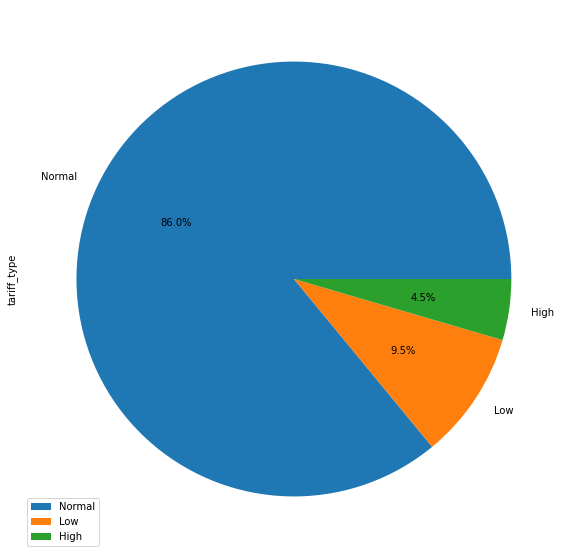

In [ ]:
# Pie Chart for Tariff Weightages
type_counts = df['Tariff'].value_counts()
df2 = pd.DataFrame({'tariff_type': type_counts}, 
                     index = ['Normal', 'Low', 'High']
                   )
df2.plot.pie(y='tariff_type', figsize=(10,10), autopct='%1.1f%%')

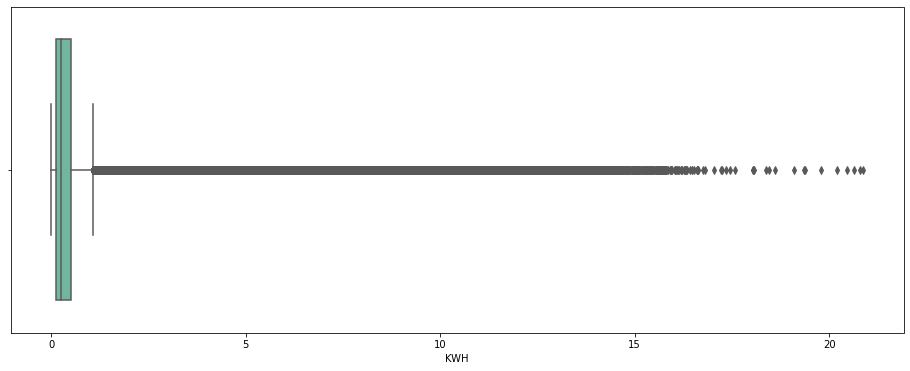

In [ ]:
# Distribution of KWH
plt.figure(figsize=(16,6))
bp1 = sns.boxplot(x='KWH', data=df, orient="h", palette = "Set2")

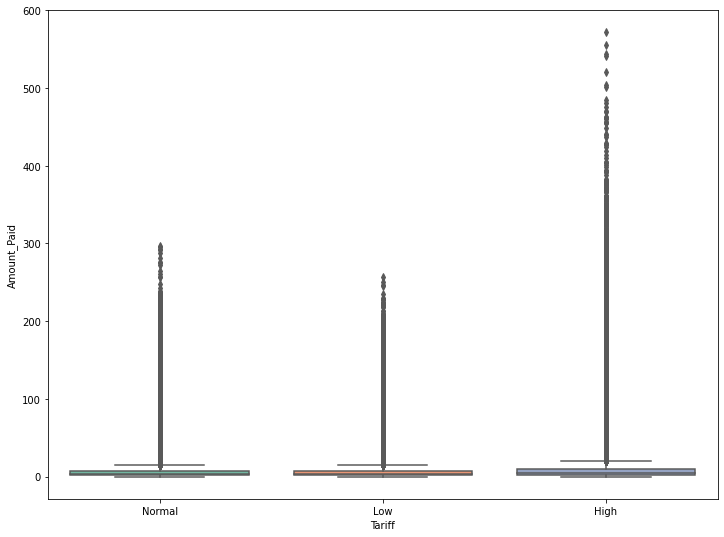

In [ ]:
# Distribution of Amount Paid with Tariff
plt.figure(figsize=(12,9))
bp4 = sns.boxplot(x='Tariff', y = 'Amount_Paid', data=df, orient="v", palette = "Set2")

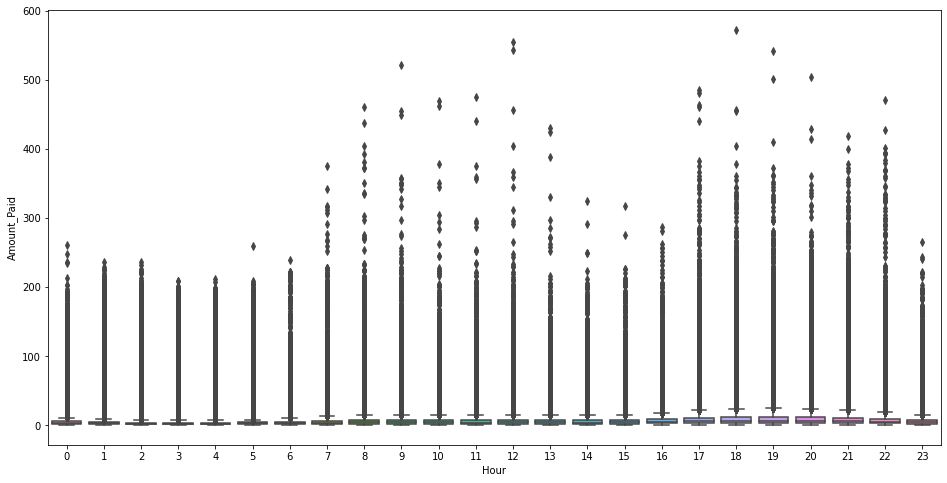

In [ ]:
# Distribution of Amount Paid with Hours
plt.figure(figsize=(16,8))
bp5 = sns.boxplot(x='Hour', y = 'Amount_Paid', data=df, orient="v")

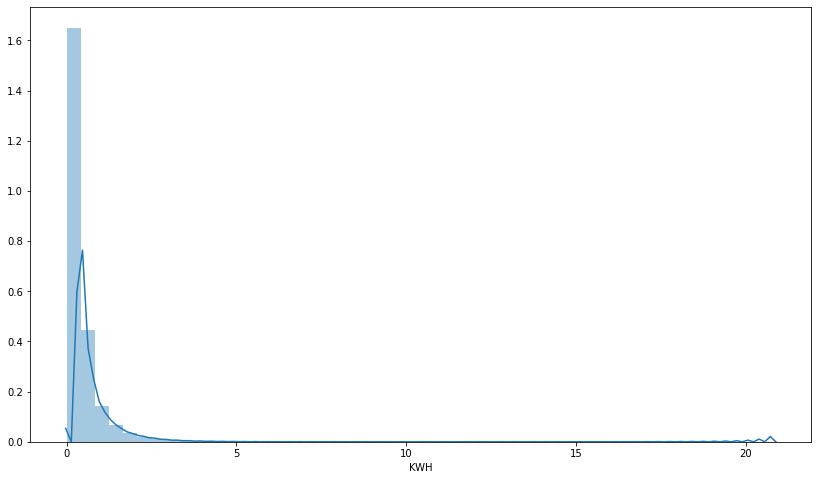

In [ ]:
# Distribution of KWH Consumption
filter_data = df.dropna(subset=['KWH'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['KWH'], kde=True)

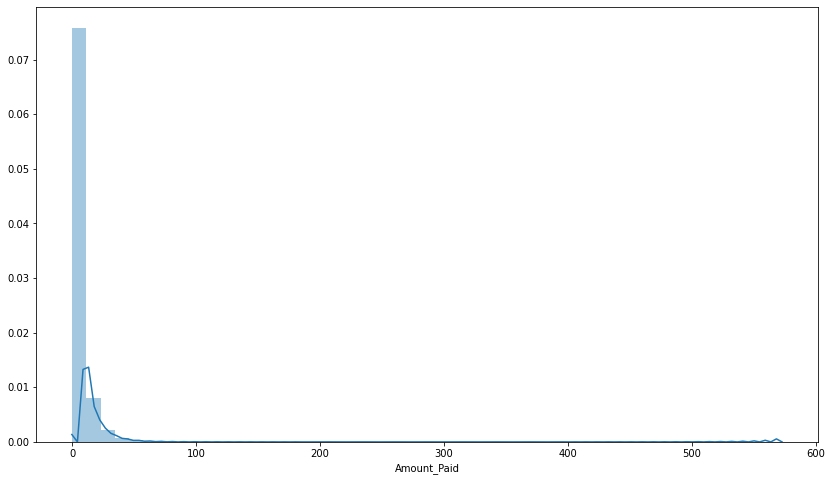

In [ ]:
# Distribution of Amount Paid with Consumption
filter_data = df.dropna(subset=['Amount_Paid'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Amount_Paid'], kde=True)

#### 3.2 Correlation and Dependency between Categorical and Numerical Values

In [ ]:
# Dictionary to convert categorical to numerical data
acorn_grouped_map = {'Affluent': 1, 'Comfortable': 2, 'Adversity': 3, 'ACORN-U': 4, 'ACORN-': 5}
stdorToU_map = {'Std': 0, 'ToU': 1}
tariff_map = {'Low': 0, 'Normal': 1, 'High': 2}

In [ ]:
# Correlation Matrix
df.replace({'Acorn_grouped': acorn_grouped_map, 'stdorToU': stdorToU_map, 'Tariff': tariff_map}).corr()

,Year,Month,Day,Hour,stdorToU,KWH,Acorn_grouped,Amount_Paid,Tariff
Year,1.000000,-0.503627,-0.037480,-0.001043,-0.014332,0.024975,0.018586,0.024378,-0.008276
Month,-0.503627,1.000000,0.014708,0.000050,-0.008464,-0.022166,0.002205,-0.021497,-0.011657
Day,-0.037480,0.014708,1.000000,-0.000207,-0.000263,-0.000349,0.000154,0.000026,-0.036655
Hour,-0.001043,0.000050,-0.000207,1.000000,0.000007,0.198225,-0.000024,0.196248,0.088706
stdorToU,-0.014332,-0.008464,-0.000263,0.000007,1.000000,-0.006057,-0.069138,-0.008857,0.000416
KWH,0.024975,-0.022166,-0.000349,0.198225,-0.006057,1.000000,-0.100835,0.979245,0.018885
Acorn_grouped,0.018586,0.002205,0.000154,-0.000024,-0.069138,-0.100835,1.000000,-0.098708,-0.000413
Amount_Paid,0.024378,-0.021497,0.000026,0.196248,-0.008857,0.979245,-0.098708,1.000000,0.035164
Tariff,-0.008276,-0.011657,-0.036655,0.088706,0.000416,0.018885,-0.000413,0.035164,1.000000


[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'Month'),
 Text(2.5, 0, 'Day'),
 Text(3.5, 0, 'Hour'),
 Text(4.5, 0, 'stdorToU'),
 Text(5.5, 0, 'KWH'),
 Text(6.5, 0, 'Acorn_grouped'),
 Text(7.5, 0, 'Amount_Paid'),
 Text(8.5, 0, 'Tariff')]

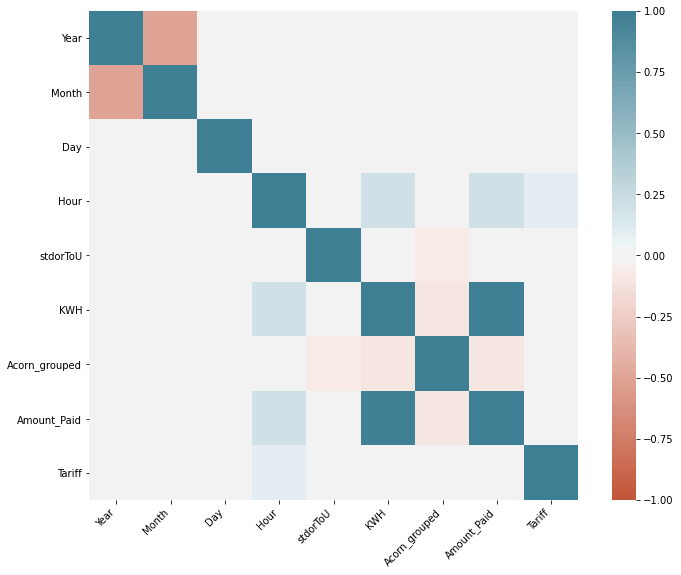

In [ ]:
# Heat Map to show relations between all data
corr = df.replace({'Acorn_grouped': acorn_grouped_map, 'stdorToU': stdorToU_map, 'Tariff': tariff_map}).corr()
plt.subplots(figsize = (12,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

#### 3.3 Average Energy Usage by Month Data Processing

In [ ]:
month_df = df[['LCLid', 'Year', 'Month', 'KWH', 'Acorn_grouped', 'Amount_Paid']]
month_df

,LCLid,Year,Month,KWH,Acorn_grouped,Amount_Paid
0,MAC000002,2012,10,0.331851,Affluent,4.721575
1,MAC000002,2012,10,0.269969,Affluent,3.841117
2,MAC000002,2012,10,0.237100,Affluent,3.373455
3,MAC000002,2012,10,0.223529,Affluent,3.180368
4,MAC000002,2012,10,0.222612,Affluent,3.167328
...,...,...,...,...,...,...
46444309,MAC005565,2012,6,0.062000,Affluent,0.247380
46444310,MAC005565,2012,6,1.150000,Affluent,13.524000
46444311,MAC005565,2012,6,0.261000,Affluent,3.069360
46444312,MAC005565,2012,6,0.025000,Affluent,0.294000


In [ ]:
aggregate_function = {'LCLid': 'first', 'Year': 'first', 'Month': 'first', 'KWH': 'sum', 'Acorn_grouped': 'first', 'Amount_Paid': 'sum'}
group_month_df = month_df.groupby(['Acorn_grouped', 'LCLid', 'Month']).aggregate(aggregate_function)

In [ ]:
group_month_df

LCLid  Year  ...  Acorn_grouped  Amount_Paid
Acorn_grouped LCLid     Month                   ...                            
ACORN-        MAC005492 1      MAC005492  2014  ...         ACORN-  3483.311580
                        2      MAC005492  2014  ...         ACORN-  3446.929710
                        4      MAC005492  2012  ...         ACORN-  1397.146590
                        5      MAC005492  2012  ...         ACORN-  5924.784810
                        6      MAC005492  2012  ...         ACORN-  7061.859840
...                                  ...   ...  ...            ...          ...
Comfortable   MAC005551 8      MAC005551  2012  ...    Comfortable  7249.557630
                        9      MAC005551  2012  ...    Comfortable  6977.270158
                        10     MAC005551  2012  ...    Comfortable  6154.446480
                        11     MAC005551  2012  ...    Comfortable  7194.632340
                        12     MAC005551  2012  ...    Comfortable  9086.346990

[37290 rows x 6 columns]

In [ ]:
group_month_df.index =  range(0,group_month_df.shape[0])
group_month_df

,LCLid,Year,Month,KWH,Acorn_grouped,Amount_Paid
0,MAC005492,2014,1,265.949,ACORN-,3483.311580
1,MAC005492,2014,2,229.790,ACORN-,3446.929710
2,MAC005492,2012,4,111.095,ACORN-,1397.146590
3,MAC005492,2012,5,407.354,ACORN-,5924.784810
4,MAC005492,2012,6,433.842,ACORN-,7061.859840
...,...,...,...,...,...,...
37285,MAC005551,2012,8,620.906,Comfortable,7249.557630
37286,MAC005551,2012,9,533.658,Comfortable,6977.270158
37287,MAC005551,2012,10,463.992,Comfortable,6154.446480
37288,MAC005551,2012,11,510.632,Comfortable,7194.632340


In [ ]:
aggregate_function = {'LCLid': 'first', 'Year': 'first', 'Month': 'first', 'KWH': 'mean', 'Acorn_grouped': 'first', 'Amount_Paid': 'mean'}
final_df = group_month_df.groupby(['Acorn_grouped', 'Month']).aggregate(aggregate_function)

In [ ]:
final_df

LCLid  Year  ...  Acorn_grouped   Amount_Paid
Acorn_grouped Month                   ...                             
ACORN-        1      MAC005492  2014  ...         ACORN-   3483.311580
              2      MAC005492  2014  ...         ACORN-   3446.929710
              4      MAC005492  2012  ...         ACORN-   1397.146590
              5      MAC005492  2012  ...         ACORN-   5924.784810
              6      MAC005492  2012  ...         ACORN-   7061.859840
              7      MAC005492  2012  ...         ACORN-   5785.368329
              8      MAC005492  2012  ...         ACORN-   5282.673060
              9      MAC005492  2012  ...         ACORN-   4982.864670
              10     MAC005492  2012  ...         ACORN-   7038.275161
              11     MAC005492  2012  ...         ACORN-   7117.949161
              12     MAC005492  2012  ...         ACORN-   6512.311883
ACORN-U       1      MAC000023  2012  ...        ACORN-U  12787.326216
              2      MAC000023  2012  ...        ACORN-U  10592.233724
              3      MAC000023  2012  ...        ACORN-U   8026.952034
              4      MAC000023  2012  ...        ACORN-U   5586.591884
              5      MAC000023  2012  ...        ACORN-U   5384.707352
              6      MAC000023  2012  ...        ACORN-U   5559.408969
              7      MAC000023  2012  ...        ACORN-U   5572.443218
              8      MAC000023  2012  ...        ACORN-U   6082.316544
              9      MAC000023  2012  ...        ACORN-U   7184.784544
              10     MAC000023  2012  ...        ACORN-U   9322.142221
              11     MAC000023  2012  ...        ACORN-U  10345.800605
              12     MAC000023  2011  ...        ACORN-U  12063.977930
Adversity     1      MAC000003  2013  ...      Adversity   8616.504033
              2      MAC000003  2012  ...      Adversity   7498.955369
              3      MAC000003  2012  ...      Adversity   4593.216454
              4      MAC000003  2012  ...      Adversity   4239.781567
              5      MAC000003  2012  ...      Adversity   4995.757396
              6      MAC000003  2012  ...      Adversity   5244.427023
              7      MAC000003  2012  ...      Adversity   5692.569025
              8      MAC000003  2012  ...      Adversity   5678.381433
              9      MAC000003  2012  ...      Adversity   5826.552475
              10     MAC000003  2012  ...      Adversity   7026.145538
              11     MAC000003  2012  ...      Adversity   7605.756650
              12     MAC000003  2012  ...      Adversity   8688.810543
Affluent      1      MAC000002  2013  ...       Affluent  12603.751652
              2      MAC000002  2013  ...       Affluent  11000.328068
              3      MAC000002  2013  ...       Affluent   7112.746688
              4      MAC000002  2013  ...       Affluent   6207.935151
              5      MAC000002  2013  ...       Affluent   6807.599247
              6      MAC000002  2013  ...       Affluent   7055.535158
              7      MAC000002  2013  ...       Affluent   7354.633522
              8      MAC000002  2013  ...       Affluent   7145.042931
              9      MAC000002  2013  ...       Affluent   7923.965017
              10     MAC000002  2012  ...       Affluent   9547.146020
              11     MAC000002  2012  ...       Affluent  10987.320842
              12     MAC000002  2012  ...       Affluent  12401.935482
Comfortable   1      MAC000007  2013  ...    Comfortable  10995.510601
              2      MAC000007  2013  ...    Comfortable   9558.344094
              3      MAC000007  2013  ...    Comfortable   5923.232263
              4      MAC000007  2013  ...    Comfortable   5134.762486
              5      MAC000007  2013  ...    Comfortable   5787.556859
              6      MAC000007  2013  ...    Comfortable   6055.449691
              7      MAC000007  2013  ...    Comfortable   6510.112089
              8      MAC000007  2013  ...    Comf

In [ ]:
final_df = final_df.drop(['LCLid', 'Year', 'Month', 'Acorn_grouped'], axis=1)
final_df

KWH   Amount_Paid
Acorn_grouped Month                          
ACORN-        1      265.949000   3483.311580
              2      229.790000   3446.929710
              4      111.095000   1397.146590
              5      407.354000   5924.784810
              6      433.842000   7061.859840
              7      459.207000   5785.368329
              8      448.001000   5282.673060
              9      367.662000   4982.864670
              10     502.096000   7038.275161
              11     518.279000   7117.949161
              12     408.422000   6512.311883
ACORN-U       1      898.743760  12787.326216
              2      744.463995  10592.233724
              3      564.165873   8026.952034
              4      392.647729   5586.591884
              5      378.458487   5384.707352
              6      390.737206   5559.408969
              7      391.653305   5572.443218
              8      427.489214   6082.316544
              9      504.975017   7184.784544
              10     655.196951   9322.142221
              11     727.143703  10345.800605
              12     847.903987  12063.977930
Adversity     1      606.450329   8616.504033
              2      526.853434   7498.955369
              3      323.260243   4593.216454
              4      298.633311   4239.781567
              5      351.244618   4995.757396
              6      367.926983   5244.427023
              7      400.729344   5692.569025
              8      399.970060   5678.381433
              9      410.024917   5826.552475
              10     494.277619   7026.145538
              11     535.037803   7605.756650
              12     610.257196   8688.810543
Affluent      1      888.077443  12603.751652
              2      770.971777  11000.328068
              3      500.852353   7112.746688
              4      437.978618   6207.935151
              5      478.075428   6807.599247
              6      493.132159   7055.535158
              7      519.198360   7354.633522
              8      505.612792   7145.042931
              9      558.330703   7923.965017
              10     671.935837   9547.146020
              11     772.851139  10987.320842
              12     868.452760  12401.935482
Comfortable   1      774.332647  10995.510601
              2      670.773805   9558.344094
              3      417.038706   5923.232263
              4      361.905812   5134.762486
              5      406.617485   5787.556859
              6      423.528794   6055.449691
              7      458.975620   6510.112089
              8      450.200608   6373.208668
              9      476.567468   6764.361841
              10     601.477219   8548.158002
              11     676.871902   9622.971457
              12     781.003819  11130.610865

In [ ]:
final_df.reset_index(inplace = True)
final_df

,Acorn_grouped,Month,KWH,Amount_Paid
0,ACORN-,1,265.949000,3483.311580
1,ACORN-,2,229.790000,3446.929710
2,ACORN-,4,111.095000,1397.146590
3,ACORN-,5,407.354000,5924.784810
4,ACORN-,6,433.842000,7061.859840
5,ACORN-,7,459.207000,5785.368329
6,ACORN-,8,448.001000,5282.673060
7,ACORN-,9,367.662000,4982.864670
8,ACORN-,10,502.096000,7038.275161
9,ACORN-,11,518.279000,7117.949161


#### 3.4 Average Energy Usage by Month Dataframe and Plot

In [ ]:
final_df = final_df.pivot(index='Month', columns = 'Acorn_grouped', values = 'KWH')

In [ ]:
# Accounting for missing value for (March, ACORN-) owing to missing data
final_df.at[3,'ACORN-'] = (final_df.loc[2,'ACORN-'] + final_df.loc[4,'ACORN-'])/2
final_df

Acorn_grouped,ACORN-,ACORN-U,Adversity,Affluent,Comfortable
Month,,,,,
1,265.9490,898.743760,606.450329,888.077443,774.332647
2,229.7900,744.463995,526.853434,770.971777,670.773805
3,170.4425,564.165873,323.260243,500.852353,417.038706
4,111.0950,392.647729,298.633311,437.978618,361.905812
5,407.3540,378.458487,351.244618,478.075428,406.617485
6,433.8420,390.737206,367.926983,493.132159,423.528794
7,459.2070,391.653305,400.729344,519.198360,458.975620
8,448.0010,427.489214,399.970060,505.612792,450.200608
9,367.6620,504.975017,410.024917,558.330703,476.567468


In [ ]:
#test = final_df.reset_index(inplace = True)
#test

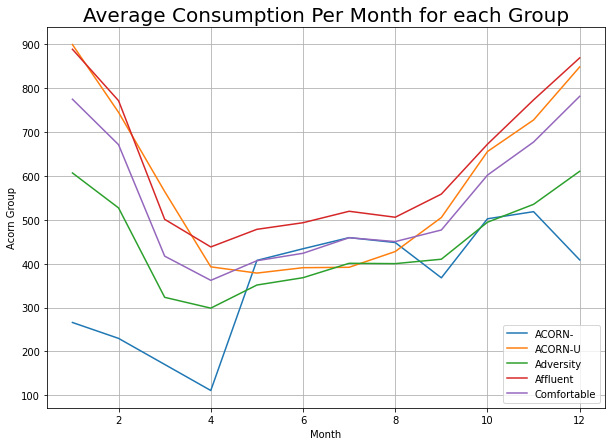

In [ ]:
ax = plt.gca()

final_df.plot(figsize = (10,7), kind='line', y='ACORN-',ax=ax, grid = True)
final_df.plot(figsize = (10,7), kind='line', y='ACORN-U',ax=ax, grid = True)
final_df.plot(figsize = (10,7), kind='line', y='Adversity',ax=ax, grid = True)
final_df.plot(figsize = (10,7), kind='line', y='Affluent',ax=ax, grid = True)
final_df.plot(figsize = (10,7), kind='line', y='Comfortable',ax=ax, grid = True)
plt.ylabel('Average Consumption')
plt.title('Average Consumption Per Month for each Group', fontsize = 20)

plt.show()

#### 3.5 Average Energy Usage by Time of day

In [ ]:
grouped_frame=df.groupby(["Hour"])["KWH"]
m=list(grouped_frame.mean())
time=[]
for x in range(1,25):
  time.append(x)
new_time=[]
def convert_time(x):
  if x<12:
    return (str(x)+":00 pm")
  else:
    if x==12:
      return (str(x)+":00 am")
    if x==24:
      return (str(x-12)+":00 pm")
    else :
      return (str(x-12)+":00 am")
a=(map(convert_time,time))
time=list(a)
data={"Time":time,"Consumption":m}


#### 3.6 Average Energy Usage By Time of Day Dataframe and Plots

In [ ]:
final_df2 = pd.DataFrame(data)
final_df2

,Time,Consumption
0,1:00 pm,0.334887
1,2:00 pm,0.272593
2,3:00 pm,0.239530
3,4:00 pm,0.225853
4,5:00 pm,0.224917
5,6:00 pm,0.250160
6,7:00 pm,0.317030
7,8:00 pm,0.394823
8,9:00 pm,0.437873
9,10:00 pm,0.443232


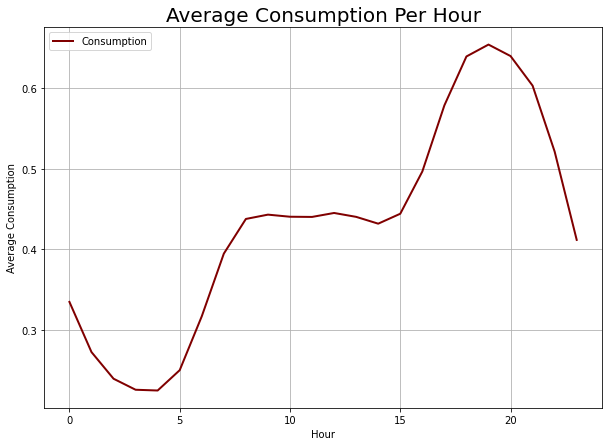

In [ ]:
ax = plt.gca()

final_df2.plot(figsize = (10,7), kind='line', y='Consumption',ax=ax, grid = True, linewidth = 2, color = 'maroon')
plt.ylabel('Average Consumption')
plt.xlabel('Hour')
plt.title('Average Consumption Per Hour', fontsize = 20)

plt.show()

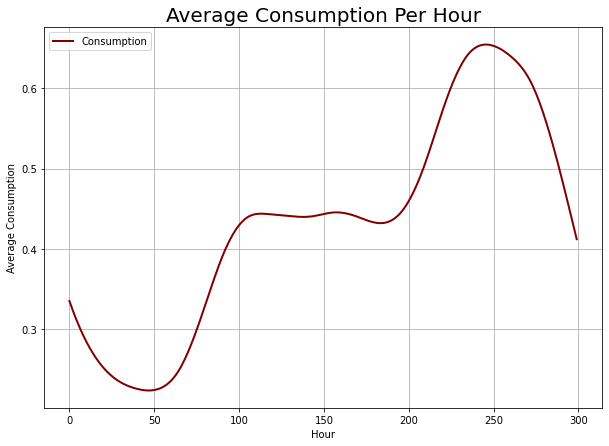

In [ ]:
# Smoothing using interpolation to show better results
x = np.linspace(0,23,24)
x_new = np.linspace(0,23,300)
y = final_df2['Consumption']
y_new = interp1d(x,y,kind = 'cubic')

for_df = list(zip(x_new, y_new(x_new)))
smooth_df = pd.DataFrame(for_df, columns = ['Hour', 'Consumption'])

ax = plt.gca()

smooth_df.plot(figsize = (10,7), kind='line', y='Consumption',ax=ax, grid = True, linewidth = 2, color = 'maroon')
plt.ylabel('Average Consumption')
plt.xlabel('Hour')
plt.title('Average Consumption Per Hour', fontsize = 20)

plt.show()

#### 3.7 Average usage by weather in Std or ToU groups

In [ ]:
season ={1:"Winter",12:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall"}

In [ ]:
# Assigning a season to each month based on the dictionary above
weather=[season[x] for x in df["Month"]]
df["Season"]=weather

In [ ]:
grouped_frame=df.groupby(["stdorToU",weather])["KWH"]

In [ ]:
dic_std={}
dic_tou={}
for x in grouped_frame:
  weather=x[0][1]
  group=x[0][0]
  mean=x[1].mean()
  if(group=="Std"):
    dic_std[weather]=mean
  else:
    dic_tou[weather]=mean

#### 3.8 Average Energy usage by weather Dataframe and Plot

In [ ]:
answer_df1=pd.DataFrame(list(dic_std.values()),list(dic_std.keys()),columns=["Consumption (Std)"])
answer_df2=pd.DataFrame(list(dic_tou.values()),list(dic_tou.keys()),columns=["Consumption (ToU)"])

answer_df1.index.name="Season"
answer_df2.index.name="Season"
answer_df1.merge(answer_df2,on="Season")

,Consumption (Std),Consumption (ToU)
Season,,
Fall,0.425063,0.398694
Spring,0.429669,0.421529
Summer,0.350677,0.319332
Winter,0.510207,0.506522


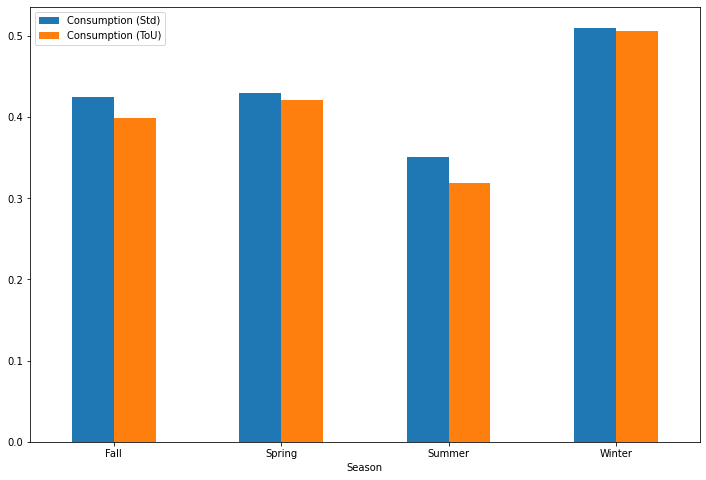

In [ ]:
# Bar plot to compare average consumption by weather
answer_df1.merge(answer_df2,on="Season").plot.bar(rot=0,figsize=(12,8))